# Neural Networks
## Backpropagation Algorithm

#### Kshitiz Gehlot
#### 2017UIT2614

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Activation Functions

In [2]:
def sigmoid(x):
    """
    Take numpy array and return elementwise sigmoid, with same shape
    """
    return 1/(1+np.exp(-x))


In [3]:
@np.vectorize
def inv_sigmoid(x):
    """
    Take numpy array and return elementwise inverse sigmoid, with same shape
    """
    return sigmoid(x)*(1-sigmoid(x))

### Forward Propagation

In [4]:
def forward_prop(X, weights):
    """
    X is the input vector, and 
    weights is a tuple of (W1, W2)

    return Y, Z and cache
    """
    W1, W2 = weights
    Zin = X@W1
    Z = sigmoid(Zin)     
    Yin = Z@W2
    Y = sigmoid(Yin)
    
    cache = (Zin, Yin)

    return Y, Z, cache

### Back Propagation

In [5]:
def back_prop(X, T, Y, Z, weights, cache, alpha):
    """
    X = inputs
    T = targets
    Y = output
    Z = Hidden layer output
    weights = (W1, W2)
    cache = (Zin, Yin)
    """
    
    (W1, W2) = weights
    (Zin, Yin) = cache

    deltaY = (T-Y)*inv_sigmoid(Yin)
    deltaW2 = alpha*(Z.T@deltaY)

    deltaZ = (deltaY@W2.T)*inv_sigmoid(Zin)
    deltaW1 = alpha*(X.T@deltaZ)
    
    W1 = W1+deltaW1

    W2 = W2+deltaW2

    return (W1, W2)

In [6]:
def iterate(X, T, weights, alpha):
    e=0
    for i in range(N):
        x = np.reshape(X[i], (1, 2))
        t = np.reshape(T[i], (1, 1))
        Y, Z, cache = forward_prop(x, weights)
        e += np.square(t-Y)[0]

        weights = back_prop(x, t, Y, Z, weights, cache, alpha)
    errors.append(e/4)
    return weights

### Running the algorithm on XOR


In [7]:
X = np.array([[0.1, 0.1], [0.1, 0.9], [0.9, 0.1], [0.9, 0.9]])
T = np.array([0.1, 0.9, 0.9, 0.1])

In [8]:
X.shape, T.shape

((4, 2), (4,))

In [9]:
N = X.shape[0]

In [10]:
alpha = 0.5

In [11]:
W1 = 2*np.random.rand(2, 2)-0.5
W2 = 2*np.random.rand(2, 1)-0.5
weights = W1, W2

In [12]:
errors = []

In [13]:
for i in range(10000):
    weights = iterate(X, T, weights, alpha)
    if (i+1)%1000 == 0:
        print(f"Iteration {i+1} done")


Iteration 1000 done
Iteration 2000 done
Iteration 3000 done
Iteration 4000 done
Iteration 5000 done
Iteration 6000 done
Iteration 7000 done
Iteration 8000 done
Iteration 9000 done
Iteration 10000 done


### Predictions

In [14]:
Y, _, _ = forward_prop(X, weights)

In [15]:
Y

array([[0.25576198],
       [0.75802925],
       [0.73505302],
       [0.16013155]])

In [16]:
weights

(array([[0.76248518, 3.73746336],
        [0.73722239, 3.73561926]]), array([[-27.74268554],
        [ 20.39728422]]))

Error vs Iterations

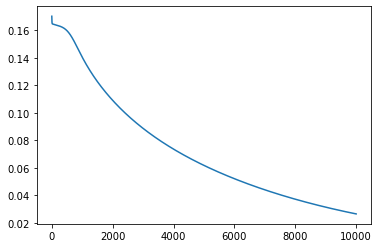

In [17]:
plt.plot(errors)